In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVD, KNNBasic
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt

In [2]:
#a

reader = Reader(line_format = "user item rating timestamp", sep = ',', skip_lines = 1)
data = Dataset.load_from_file("ratings_small.csv", reader = reader)

In [3]:
#b,c

# Initialize algorithms
algo_pmf = SVD(biased=False)
algo_user_cf = KNNBasic(sim_options={'user_based': True})
algo_item_cf = KNNBasic(sim_options={'user_based': False})

# Perform cross-validation
results_pmf = cross_validate(algo_pmf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print("------")
results_user_cf = cross_validate(algo_user_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print("------")
results_item_cf = cross_validate(algo_item_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0078  1.0053  1.0084  1.0070  1.0062  1.0069  0.0011  
MAE (testset)     0.7780  0.7736  0.7792  0.7770  0.7790  0.7774  0.0020  
Fit time          0.31    0.31    0.31    0.31    0.30    0.31    0.00    
Test time         0.07    0.03    0.07    0.03    0.03    0.05    0.02    
------
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9702  0.9647  0.9677  0.9746  0.9648  0.9684 

In [4]:
#d

# Calculate and print mean RMSE and MAE for each algorithm
print("\nAverage Performances:")
print("PMF (SVD) - Mean RMSE: {:.4f}, Mean MAE: {:.4f}".format(results_pmf['test_rmse'].mean(), results_pmf['test_mae'].mean()))
print("User-based CF - Mean RMSE: {:.4f}, Mean MAE: {:.4f}".format(results_user_cf['test_rmse'].mean(), results_user_cf['test_mae'].mean()))
print("Item-based CF - Mean RMSE: {:.4f}, Mean MAE: {:.4f}".format(results_item_cf['test_rmse'].mean(), results_item_cf['test_mae'].mean()))


Average Performances:
PMF (SVD) - Mean RMSE: 1.0069, Mean MAE: 0.7774
User-based CF - Mean RMSE: 0.9684, Mean MAE: 0.7442
Item-based CF - Mean RMSE: 0.9354, Mean MAE: 0.7217


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0003  0.9950  0.9942  0.9976  0.9824  0.9939  0.0061  
MAE (testset)     0.7701  0.7703  0.7674  0.7693  0.7613  0.7677  0.0034  
Fit time          0.04    0.04    0.04    0.04    0.04    0.04    0.00    
Test time         0.44    0.37    0.37    0.37    0.37    0.38    0.03    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity ma

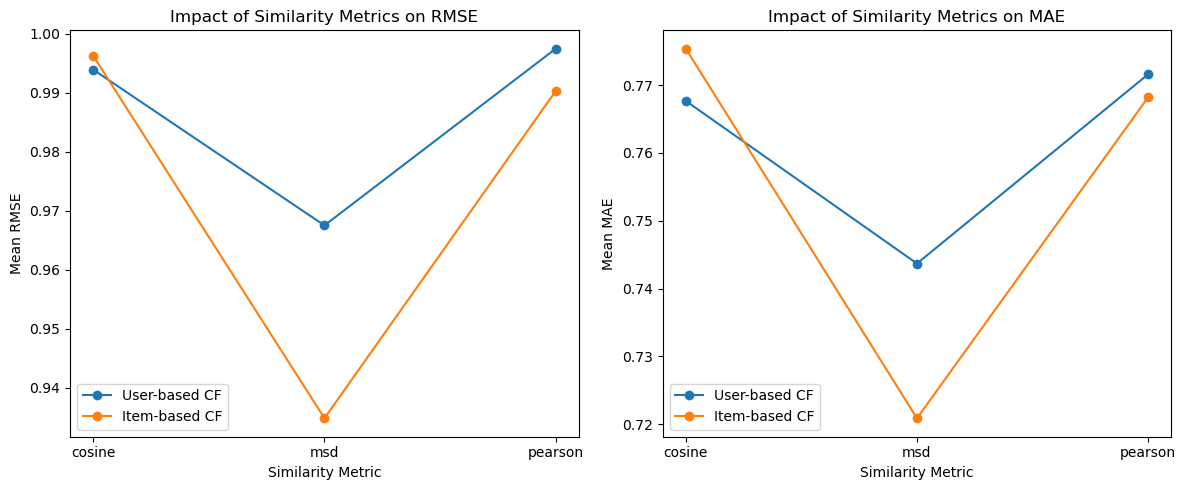

In [5]:
#e

similarities = ['cosine', 'msd', 'pearson']
user_rmse = []
user_mae = []
item_rmse = []
item_mae = []

for sim in similarities:
    # User-based CF
    algo_user = KNNBasic(sim_options={'name' : sim, 'user_based': True})
    results = cross_validate(algo_user, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    user_rmse.append(results['test_rmse'].mean())
    user_mae.append(results['test_mae'].mean())

    # Item-based CF
    algo_item = KNNBasic(sim_options={'name' : sim, 'user_based': False})
    results = cross_validate(algo_item, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    item_rmse.append(results['test_rmse'].mean())
    item_mae.append(results['test_mae'].mean())

print("user_rmse: ", user_rmse)
print("user_mae: ", user_mae)
print("item_rmse: ", item_rmse)
print("item_mae: ", item_mae)

# Plot RMSE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(similarities, user_rmse, marker='o', label='User-based CF')
plt.plot(similarities, item_rmse, marker='o', label='Item-based CF')
plt.xlabel('Similarity Metric')
plt.ylabel('Mean RMSE')
plt.title('Impact of Similarity Metrics on RMSE')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(similarities, user_mae, marker='o', label='User-based CF')
plt.plot(similarities, item_mae, marker='o', label='Item-based CF')
plt.xlabel('Similarity Metric')
plt.ylabel('Mean MAE')
plt.title('Impact of Similarity Metrics on MAE')
plt.legend()

plt.tight_layout()
plt.show()

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

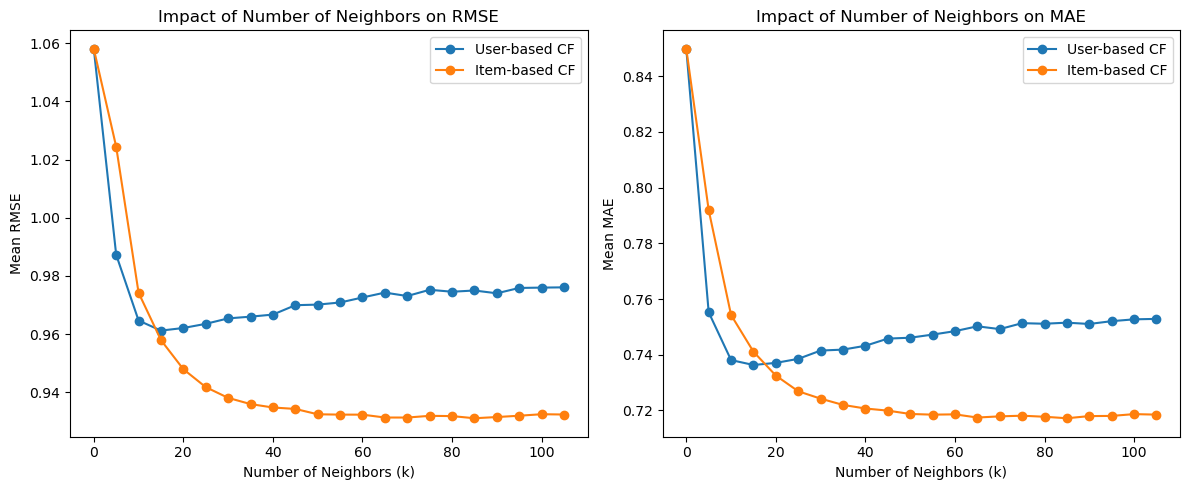

In [6]:
#f

neighbors = range(0, 110, 5)
user_rmse_neighbors = []
user_mae_neighbors = []
item_rmse_neighbors = []
item_mae_neighbors = []

for k in neighbors:
    # User-based CF
    algo_user = KNNBasic(k=k, sim_options={'user_based': True})
    results = cross_validate(algo_user, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    user_rmse_neighbors.append(results['test_rmse'].mean())
    user_mae_neighbors.append(results['test_mae'].mean())

    # Item-based CF
    algo_item = KNNBasic(k=k, sim_options={'user_based': False})
    results = cross_validate(algo_item, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    item_rmse_neighbors.append(results['test_rmse'].mean())
    item_mae_neighbors.append(results['test_mae'].mean())

# Plot RMSE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(neighbors, user_rmse_neighbors, marker='o', label='User-based CF')
plt.plot(neighbors, item_rmse_neighbors, marker='o', label='Item-based CF')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean RMSE')
plt.title('Impact of Number of Neighbors on RMSE')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(neighbors, user_mae_neighbors, marker='o', label='User-based CF')
plt.plot(neighbors, item_mae_neighbors, marker='o', label='Item-based CF')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean MAE')
plt.title('Impact of Number of Neighbors on MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
#g

print("Best K for User-based CF based on RMSE: K = {}, RMSE = {:.4f}".format((user_rmse_neighbors.index(min(user_rmse_neighbors)))*5, min(user_rmse_neighbors)))
print("Best K for User-based CF based on MAE:  K = {}, MAE  = {:.4f}".format((user_mae_neighbors.index(min(user_mae_neighbors)))*5, min(user_mae_neighbors)))
print("Best K for Item-based CF based on RMSE: K = {}, RMSE = {:.4f}".format((item_rmse_neighbors.index(min(item_rmse_neighbors)))*5, min(item_rmse_neighbors)))
print("Best K for Item-based CF based on MAE:  K = {}, MAE  = {:.4f}".format((item_mae_neighbors.index(min(item_mae_neighbors)))*5, min(item_mae_neighbors)))

Best K for User-based CF based on RMSE: K = 15, RMSE = 0.9612
Best K for User-based CF based on MAE:  K = 15, MAE  = 0.7363
Best K for Item-based CF based on RMSE: K = 85, RMSE = 0.9310
Best K for Item-based CF based on MAE:  K = 85, MAE  = 0.7172
